In [53]:
# %matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import numpy as np 



In [54]:
PATH = "../results/overtaking-h-collisions.csv"
with open(PATH, "r") as f:
    print(f.readline())

step,contactLevel,contactEvents,drone_speed,drone_horizontal_turn_rate,heli_speed,drone_response_distance



In [55]:
all_exps = pd.read_csv(PATH)#.drop_duplicates()
print(all_exps.shape[0])
all_exps['is_violation'] = np.where(
    (all_exps['contactLevel'] != 'none') | ("violation" in all_exps['contactEvents']) | ("collision" in all_exps['contactEvents']), 
    1, 0)
# violations = all_exps[(all_exps['contactLevel'] == 'violation') | (all_exps['contactLevel'] == 'collision')]
# violations.columns
all_exps = all_exps.round(2)
all_exps

4752


,step,contactLevel,contactEvents,drone_speed,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation
0,1039,violation,"ContactEvent[ContactEvent((Vehicle(1, (12872.2...",36.0,6.0,105.0,5000.0,1
1,1039,violation,"ContactEvent[ContactEvent((Vehicle(1, (13022.6...",37.0,6.0,105.0,5000.0,1
2,1039,violation,"ContactEvent[ContactEvent((Vehicle(1, (13104.3...",38.0,6.0,105.0,5000.0,1
3,1039,violation,"ContactEvent[ContactEvent((Vehicle(1, (13260.3...",39.0,6.0,105.0,5000.0,1
4,1039,violation,"ContactEvent[ContactEvent((Vehicle(1, (13343.9...",40.0,6.0,105.0,5000.0,1
...,...,...,...,...,...,...,...,...
4747,1039,none,ContactEvent[],40.0,20.0,125.0,8000.0,0
4748,1039,none,ContactEvent[],41.0,20.0,125.0,8000.0,0
4749,1039,none,ContactEvent[],42.0,20.0,125.0,8000.0,0
4750,1039,none,ContactEvent[],43.0,20.0,125.0,8000.0,0


In [56]:
# dups = violations.groupby([col for col in violations.columns], as_index=False).size()
# violations = violations.drop_duplicates()
# dups['size']

In [57]:
def add_temp_legend(values, element, ax):
    np.unique(values)[::-1].sort()
    colors = [ element.cmap(element.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l} violations".format(l=values[i]) ) for i in range(len(values)) ]
        
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

def heatmap(df: pd.DataFrame, x_key: str, y_key: str, title:str, skip_count_x=0, skip_count_y=0, **kwargs):
    df = df.groupby([x_key,y_key], as_index=False).agg({'is_violation': np.sum})
    df = df.pivot(columns=x_key, index=y_key, values="is_violation")
    
    fig, ax = plt.subplots()
    im = ax.imshow(np.flip(df.to_numpy(), 0), **kwargs)
    ax.set_title(title)
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    
    ax.set_xticks(np.arange(0, len(df.columns), 1)[::(skip_count_x + 1)])
    ax.set_yticks(np.arange(0, len(df.index), 1)[::-(skip_count_y + 1)])
    ax.set_xticklabels(list(map(lambda v: round(v, 2), df.columns[::(skip_count_x + 1)])))
    ax.set_yticklabels(list(map(lambda v: round(v, 2), df.index[::(skip_count_y + 1)])))
    
    values = np.unique(df.to_numpy().flatten())
    
    add_temp_legend(values, im, ax)
    
    
    
def isolate(df: pd.DataFrame, cols: dict): # keys:list[str], values:list
    exp = None
    for k, v in cols.items():
        if exp is None:
            exp = df[k] == v
        else:
            exp &= df[k] == v
            
    return df[exp]
    

In [58]:
a = [1, 2, 3, 4, 5, 6, 7]
a[::3]

list(map(lambda v: round(v, 2), a[::-(0 + 1)]))

[7, 6, 5, 4, 3, 2, 1]

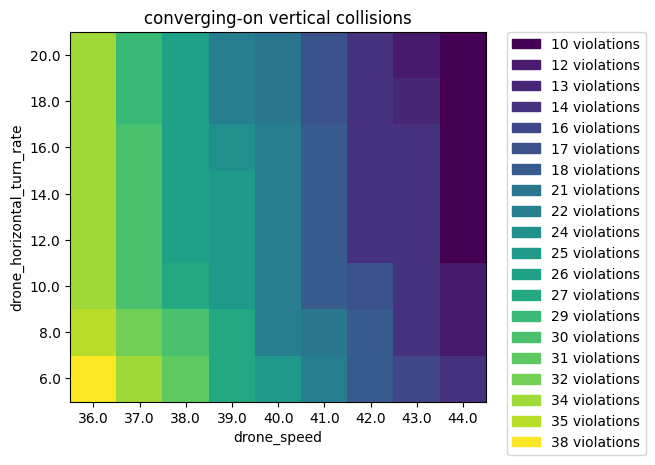

In [59]:
heatmap(all_exps, "drone_speed", "drone_horizontal_turn_rate", "converging-on vertical collisions")


In [60]:
# isolate(all_exps, {"is_violation": 1, "drone_speed": 38.584500, "drone_horizontal_turn_rate": 20.0})


Commenting on the figure above, top-right is the highest turn radius, which means
that the drone will be closer to the helicopter

In [61]:
all_exps.drone_response_distance.unique()

array([5000., 5300., 5600., 5900., 6200., 6500., 6800., 7100., 7400.,
       7700., 8000.])

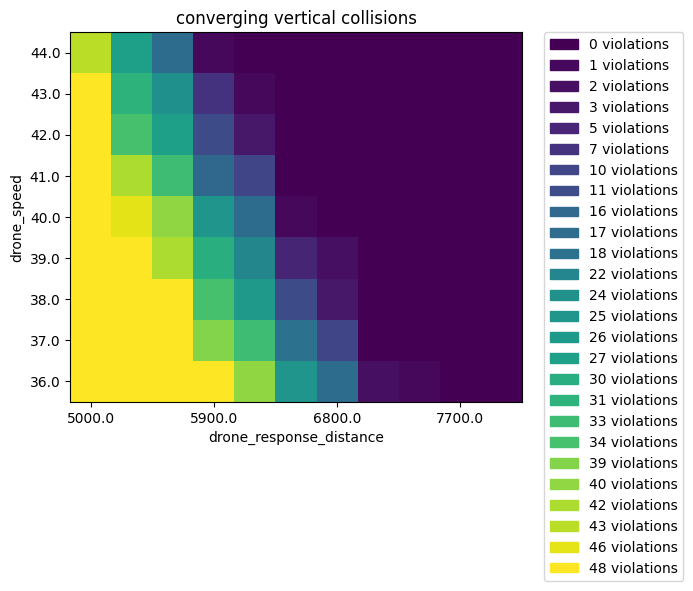

In [62]:
# tmp = all_exps[all_exps['drone_y_pos'] <= 2000]#[all_exps['drone_horizontal_turn_rate'] > 35]
# tmp = isolate(tmp, {"drone_horizontal_turn_rate": 30})
heatmap(all_exps, "drone_response_distance", "drone_speed", "converging vertical collisions", skip_count_x=2)

In [63]:
isolate(all_exps, {
    "drone_response_distance": 2000, "drone_speed": 43.66, "is_violation": 1
}).count()

step                          0
contactLevel                  0
contactEvents                 0
drone_speed                   0
drone_horizontal_turn_rate    0
heli_speed                    0
drone_response_distance       0
is_violation                  0
dtype: int64

Commenting on the figure above, the bottom left

In [64]:
all_exps[(all_exps['drone_response_distance'] == 1200) & (all_exps['drone_speed'] == 20)].describe()

,step,drone_speed,drone_horizontal_turn_rate,heli_speed,drone_response_distance,is_violation
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


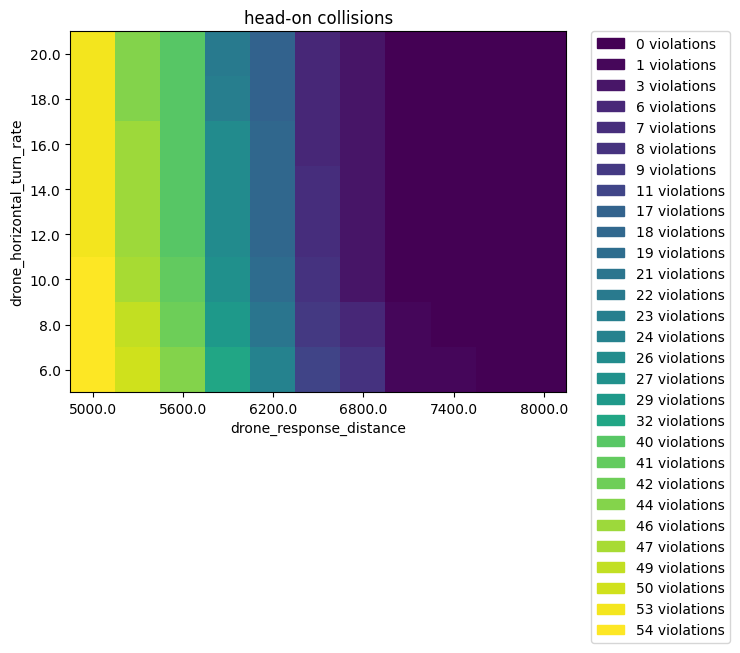

In [65]:
tmp = all_exps#[all_exps['drone_y_pos'] <= 2000]
# tmp = isolate(tmp, {"drone_speed": 20})
heatmap(tmp, "drone_response_distance", "drone_horizontal_turn_rate", "head-on collisions", skip_count_x=1)


3D, visualizing speed, rate of turn, and vis distance all in one

In [66]:
def plot_point_cloud(df: pd.DataFrame, x_key: str, y_key: str, z_key: str, title: str, point_radius: float = None):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(projection='3d')
    
    x = df[x_key].unique()
    x.sort()
    y = df[y_key].unique()
    y.sort()
    z = df[z_key].unique()
    z.sort()
    
    points = []
    temps = []
    
    
    for zi in z:
        for yi in y:
            for xi in x:
                points.append((xi, yi, zi))
                temps.append(isolate(df, {x_key:xi, y_key:yi, z_key:zi}).size)

    s = point_radius ** 2 if point_radius else None

    print(len(points), points)

    scat = ax.scatter(*np.array(points).T, c=temps, alpha=0.7, s=s)
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    ax.set_zlabel(z_key)
    ax.set_title(title)
    
        
    
    add_temp_legend(np.unique(np.array(temps[::-1]).flatten()), scat, ax)
    

In [67]:
all_exps.columns

Index(['step', 'contactLevel', 'contactEvents', 'drone_speed',
       'drone_horizontal_turn_rate', 'heli_speed', 'drone_response_distance',
       'is_violation'],
      dtype='object')

In [74]:
%matplotlib

Using matplotlib backend: TkAgg


In [75]:
# tmp = all_exps[all_exps['drone_y_pos'] <= 2000]
tmp = isolate(all_exps, {"is_violation": 1})
plot_point_cloud(tmp, "drone_speed", "drone_horizontal_turn_rate", "drone_response_distance", "Overtaking Horizontal", point_radius=20)

tmp.drone_speed.min()

648 [(36.0, 6.0, 5000.0), (37.0, 6.0, 5000.0), (38.0, 6.0, 5000.0), (39.0, 6.0, 5000.0), (40.0, 6.0, 5000.0), (41.0, 6.0, 5000.0), (42.0, 6.0, 5000.0), (43.0, 6.0, 5000.0), (44.0, 6.0, 5000.0), (36.0, 8.0, 5000.0), (37.0, 8.0, 5000.0), (38.0, 8.0, 5000.0), (39.0, 8.0, 5000.0), (40.0, 8.0, 5000.0), (41.0, 8.0, 5000.0), (42.0, 8.0, 5000.0), (43.0, 8.0, 5000.0), (44.0, 8.0, 5000.0), (36.0, 10.0, 5000.0), (37.0, 10.0, 5000.0), (38.0, 10.0, 5000.0), (39.0, 10.0, 5000.0), (40.0, 10.0, 5000.0), (41.0, 10.0, 5000.0), (42.0, 10.0, 5000.0), (43.0, 10.0, 5000.0), (44.0, 10.0, 5000.0), (36.0, 12.0, 5000.0), (37.0, 12.0, 5000.0), (38.0, 12.0, 5000.0), (39.0, 12.0, 5000.0), (40.0, 12.0, 5000.0), (41.0, 12.0, 5000.0), (42.0, 12.0, 5000.0), (43.0, 12.0, 5000.0), (44.0, 12.0, 5000.0), (36.0, 14.0, 5000.0), (37.0, 14.0, 5000.0), (38.0, 14.0, 5000.0), (39.0, 14.0, 5000.0), (40.0, 14.0, 5000.0), (41.0, 14.0, 5000.0), (42.0, 14.0, 5000.0), (43.0, 14.0, 5000.0), (44.0, 14.0, 5000.0), (36.0, 16.0, 5000.0), (

36.0

In [69]:
all_exps.drone_speed.unique()

array([36., 37., 38., 39., 40., 41., 42., 43., 44.])

In [70]:
all_exps.heli_speed.unique()

array([105., 109., 113., 117., 121., 125.])

In [71]:
all_exps.drone_x_pos.unique()

AttributeError: 'DataFrame' object has no attribute 'drone_x_pos'

In [ ]:
# best = isolate(all_exps, {'is_violation': 0, 'drone_y_pos': 4000, 'drone_response_distance': 4200, 'heli_speed': 109})
best = isolate(all_exps, 
    {
        'is_violation': 1, 
        'drone_x_pos': 3600, 
        # "drone_horizontal_turn_rate": 14.0, 
        "drone_speed": 40.62, 
        # "drone_response_distance": 6250,
        "heli_speed": 114.74
})
best.count()
# best.drone_response_distance.min()
# best = isolate(all_exps, {'is_violation': 0, 'drone_y_pos': 4000, 'drone_speed': 36, 'heli_speed': 118})
# best.drone_horizontal_turn_rate.min()
# isolate(all_exps, {
#     'is_violation': 0,
#     'drone_y_pos': 4000, 
#     "drone_speed": 40.6153, 
#     "heli_speed": 114.7383
# }).drone_response_distance.min()
# best.heli_speed
# speeds = best.drone_speed.to_numpy()
# speeds.sort()
# speeds
# best[(best.drone_response_distance == 4200)]

isolate(all_exps, {'is_violation': 1, 'drone_response_distance': 4000})

all_exps.drone_speed.min()

52.8

In [ ]:
isolate(all_exps, {"is_violation": 1}).count()

step                          2592
contactLevel                  2592
contactEvents                 2592
drone_speed                   2592
drone_horizontal_turn_rate    2592
heli_speed                    2592
drone_response_distance       2592
is_violation                  2592
dtype: int64

In [ ]:
isolate(all_exps, {"is_violation": 0}).count()

step                          0
contactLevel                  0
contactEvents                 0
drone_speed                   0
drone_horizontal_turn_rate    0
heli_speed                    0
drone_response_distance       0
is_violation                  0
dtype: int64